<a href="https://colab.research.google.com/github/gowun/bio/blob/master/final_editby_gowunjeong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
from google.colab import drive

import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

auth.authenticate_user()
drive.mount('/content/gdrive')
home_path = '/content/gdrive/My Drive/'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


Mounted at /content/gdrive


In [2]:
!pip install dtreeviz
#!pip install yellowbrick

     |████████████████████████████████| 61 kB 177 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.5-py3-none-any.whl size=67330 sha256=21b00cf4445c29df788665c241a0b6ee60c70d82d13807dd34c00c70f2eb4940
  Stored in directory: /root/.cache/pip/wheels/9d/84/55/4de0a214e0b9d21a96fc343b4a85547f3dab815a49682dfeb2
Successfully built dtreeviz


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, mean_squared_error
import matplotlib.pyplot as plt
from dtreeviz.trees import *

In [4]:
#df = pd.read_excel(home_path + 'ORIGINAL_grade_only.xlsx')
#df = pd.read_excel(home_path + 'LATEST.xlsx')
df_ = pd.read_excel(home_path + 'NEC_DB_0321.xlsx')

In [5]:
cols = df_.columns.to_list()
cols[0] = 'class'
df_.columns = cols
df_['class'].loc[df_['class'] == 2] = 0
df_['class']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0      1
1      1
2      1
3      0
4      0
      ..
206    1
207    1
208    1
209    0
210    0
Name: class, Length: 211, dtype: int64

In [6]:
cols_ = []
for c in cols:
  c = c.replace('__', '_')
  c_ = c.split('_')
  if len(c_) > 1:
    if c_[0] == 'synapto':
      c_[0] = 'synaptophysin'
    elif c_[0] == 'Chromogranin':
      c_[0] = 'chromogranin'
    elif c_[0] == 'TUBB':
      c_[0] = 'TUBB2B'
    c = '_'.join(c_)
  cols_.append(c)
df_.columns = cols_

In [7]:
df_

,class,comment,core number,registration number,surgical number,prcedure,report_diagnosis,CD117_intensity,CD117_area,SSTR2_intensity,...,TUBB2B_intensity,TUBB2B_area,GATA3_intensity,GATA3_area,CK5/6_intensity,CK5/6_area,CK14_intensity,CK14_area,CK20_intensity,CK20_area
0,1,NaN,NaN,27722817.0,02S 037659,TURB,Combined small cell carcinoma and transitional cell carcinoma,0,0,0,...,1,10,0,0,0,0,0,0,0,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,...,0,0,0,0,0,0,0,0,3,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,3,100,0,0,0,0,2,30
4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,3,100,0,0,0,0,3,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1,NaN,NaN,NaN,NaN,NaN,NaN,2,80,1,...,3,30,3,100,0,0,0,0,0,0
207,1,NaN,NaN,NaN,NaN,NaN,NaN,1,40,0,...,2,40,3,100,0,0,0,0,3,10
208,1,NaN,NaN,NaN,NaN,NaN,NaN,2,40,0,...,3,30,3,100,0,0,0,0,3,5
209,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,3,30,3,100,0,0,0,0,3,90


In [8]:
cols = np.array(cols_)[df_.isna().sum().values == 0]

In [9]:
#drop_cols = ['comment', 'registration number', 'surgical number', 'report_diagnosis', 'TUBB2B', 'TUBB2B_1']
#df = df.drop(drop_cols, 1)
df = df_[cols]

In [10]:
df.head()

,class,CD117_intensity,CD117_area,SSTR2_intensity,SSTR2_area,CD56_intensity,CD56_area,synaptophysin_intensity,synaptophysin_area,INSM1_intensity,...,TUBB2B_intensity,TUBB2B_area,GATA3_intensity,GATA3_area,CK5/6_intensity,CK5/6_area,CK14_intensity,CK14_area,CK20_intensity,CK20_area
0,1,0,0,0,0,0,0,1,50,2,...,1,10,0,0,0,0,0,0,0,0
1,1,0,0,2,5,0,0,1,50,1,...,0,0,0,0,0,0,0,0,3,1
2,1,0,0,2,10,1,60,1,80,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,3,100,0,0,0,0,2,30
4,0,0,0,0,0,0,0,0,0,0,...,0,0,3,100,0,0,0,0,3,80


In [11]:
df['class']

0      1
1      1
2      1
3      0
4      0
      ..
206    1
207    1
208    1
209    0
210    0
Name: class, Length: 211, dtype: int64

In [12]:
area_cols = list(filter(lambda x: 'intensity' not in x, cols))
area_cols

['class',
 'CD117_area',
 'SSTR2_area',
 'CD56_area',
 'synaptophysin_area',
 'INSM1_area',
 'chromogranin_area',
 'p53_area',
 'RB_area',
 'EGFR_area',
 'FOXA_area',
 'NSE_area',
 'SOX2_area',
 'TUBB2B_area',
 'GATA3_area',
 'CK5/6_area',
 'CK14_area',
 'CK20_area']

In [65]:
X = df.drop(columns=['class'])
y = df['class']

random = 1234
X_train, X_test, y_train, y_test = train_test_split(np.arange(len(df)), y, test_size=0.3, random_state=random)

area_corr = df[area_cols].iloc[X_train].corr()
corr = df.drop(['class'], 1).iloc[X_train].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [36]:
all_pairs = list(zip(corr.index, corr['class'].abs()))

area_pairs = list(zip(area_corr.index, area_corr['class'].abs()))
area_pairs = sorted(area_pairs, key=lambda x: x[1], reverse=True)
area_pairs

[('class', 1.0),
 ('GATA3_area', 0.840703170006231),
 ('synaptophysin_area', 0.7870705588358181),
 ('NSE_area', 0.6140420991516351),
 ('CD117_area', 0.6081476492765523),
 ('CD56_area', 0.5953621660467365),
 ('INSM1_area', 0.5922971457465093),
 ('SOX2_area', 0.537691119609705),
 ('CK20_area', 0.4965674526716987),
 ('EGFR_area', 0.38276964102854194),
 ('CK5/6_area', 0.3788311984384836),
 ('TUBB2B_area', 0.3647336318352209),
 ('CK14_area', 0.36050779088946566),
 ('SSTR2_area', 0.34463690121505036),
 ('chromogranin_area', 0.3257480406635958),
 ('FOXA_area', 0.18448827007102053),
 ('RB_area', 0.17514273672408104),
 ('p53_area', 0.05003689932455425)]

In [37]:
sorted_cols = list(map(lambda x: x[0], pairs))
area_corr = df[sorted_cols].iloc[X_train].corr()
area_corr

,class,GATA3_area,synaptophysin_area,NSE_area,CD117_area,CD56_area,INSM1_area,SOX2_area,CK20_area,EGFR_area,CK5/6_area,TUBB2B_area,CK14_area,SSTR2_area,chromogranin_area,FOXA_area,RB_area,p53_area
class,1.000000,-0.840703,0.787071,0.614042,0.608148,0.595362,0.592297,0.537691,-0.496567,-0.382770,-0.378831,0.364734,-0.360508,0.344637,0.325748,0.184488,0.175143,-0.050037
GATA3_area,-0.840703,1.000000,-0.668025,-0.534930,-0.529761,-0.479510,-0.454463,-0.472097,0.577558,0.292556,0.261626,-0.340158,0.177293,-0.328093,-0.305273,0.016766,-0.162238,0.086414
synaptophysin_area,0.787071,-0.668025,1.000000,0.559029,0.511417,0.654945,0.742130,0.457733,-0.361306,-0.406385,-0.298460,0.372587,-0.289847,0.415436,0.451648,0.386573,-0.067623,0.050283
NSE_area,0.614042,-0.534930,0.559029,1.000000,0.495953,0.386173,0.485439,0.471462,-0.387612,-0.327339,-0.284327,0.388874,-0.296315,0.245783,0.151162,0.181941,0.005555,0.089083
CD117_area,0.608148,-0.529761,0.511417,0.495953,1.000000,0.429203,0.445263,0.382915,-0.406006,-0.199801,-0.269261,0.423055,-0.241956,0.372861,0.158728,0.234373,-0.143418,0.136650
CD56_area,0.595362,-0.479510,0.654945,0.386173,0.429203,1.000000,0.545156,0.376909,-0.257490,-0.260261,-0.198679,0.268774,-0.213711,0.505288,0.165751,0.268360,0.087222,-0.115365
INSM1_area,0.592297,-0.454463,0.742130,0.485439,0.445263,0.545156,1.000000,0.275305,-0.236885,-0.129297,-0.221745,0.238065,-0.217182,0.392362,0.463578,0.523212,-0.227978,0.096020
SOX2_area,0.537691,-0.472097,0.457733,0.471462,0.382915,0.376909,0.275305,1.000000,-0.256002,-0.550996,-0.209850,0.466542,-0.195761,0.097202,-0.076303,0.145601,0.032764,-0.183222
CK20_area,-0.496567,0.577558,-0.361306,-0.387612,-0.406006,-0.257490,-0.236885,-0.256002,1.000000,0.109289,0.109063,-0.170856,0.023711,-0.157544,-0.097493,0.164299,-0.120501,-0.060888
EGFR_area,-0.382770,0.292556,-0.406385,-0.327339,-0.199801,-0.260261,-0.129297,-0.550996,0.109289,1.000000,0.244524,-0.353923,0.238716,-0.125217,0.128882,-0.128665,-0.114912,0.097106


In [39]:
tmp = df[sorted_cols].iloc[X_train]
tmp.columns = ['class_left'] + tmp.columns.to_list()[1:]
area_corr1 = tmp.loc[tmp['synaptophysin_area'] <= 5].corr()
area_corr1

,class_left,GATA3_area,synaptophysin_area,NSE_area,CD117_area,CD56_area,INSM1_area,SOX2_area,CK20_area,EGFR_area,CK5/6_area,TUBB2B_area,CK14_area,SSTR2_area,chromogranin_area,FOXA_area,RB_area,p53_area
class_left,1.000000,-0.713415,NaN,0.418982,0.953547,0.627005,0.416000,0.447633,-0.344254,0.185289,-0.209837,0.353020,-0.182034,0.454605,NaN,-0.158303,NaN,-0.068678
GATA3_area,-0.713415,1.000000,NaN,-0.226389,-0.668209,-0.422441,-0.296366,-0.435349,0.523185,-0.257737,-0.004357,-0.262408,-0.108255,-0.344244,NaN,0.495064,NaN,0.154403
synaptophysin_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NSE_area,0.418982,-0.226389,NaN,1.000000,0.425340,0.351153,0.305994,0.222784,-0.193424,0.230955,-0.188681,0.138265,-0.229901,0.264928,NaN,0.009218,NaN,-0.088399
CD117_area,0.953547,-0.668209,NaN,0.425340,1.000000,0.603510,0.469169,0.462372,-0.341263,0.270844,-0.219123,0.381852,-0.184929,0.499486,NaN,-0.118400,NaN,-0.143415
CD56_area,0.627005,-0.422441,NaN,0.351153,0.603510,1.000000,0.037792,0.444053,-0.274501,0.062718,-0.057687,-0.040433,-0.112464,0.094996,NaN,-0.168484,NaN,-0.144703
INSM1_area,0.416000,-0.296366,NaN,0.305994,0.469169,0.037792,1.000000,0.236638,-0.167530,0.170918,-0.075445,0.698285,-0.058051,0.940051,NaN,0.082590,NaN,0.111993
SOX2_area,0.447633,-0.435349,NaN,0.222784,0.462372,0.444053,0.236638,1.000000,-0.209795,-0.165652,-0.132367,0.141408,-0.093471,0.258085,NaN,0.013818,NaN,-0.401797
CK20_area,-0.344254,0.523185,NaN,-0.193424,-0.341263,-0.274501,-0.167530,-0.209795,1.000000,-0.345604,-0.141060,-0.182602,-0.187759,-0.174995,NaN,0.544816,NaN,0.014316
EGFR_area,0.185289,-0.257737,NaN,0.230955,0.270844,0.062718,0.170918,-0.165652,-0.345604,1.000000,0.124255,0.171443,0.161809,0.148561,NaN,-0.285164,NaN,0.111492


In [57]:
merged = pd.concat([area_corr[['class']], area_corr1['class_left']], 1)
merged = merged.drop(['class', 'class_left'])
merged.columns = ['class', 'class_synaptophysin_area<=5']
merged

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


,class,class_synaptophysin_area<=5
GATA3_area,-0.840703,-0.713415
synaptophysin_area,0.787071,NaN
NSE_area,0.614042,0.418982
CD117_area,0.608148,0.953547
CD56_area,0.595362,0.627005
INSM1_area,0.592297,0.416000
SOX2_area,0.537691,0.447633
CK20_area,-0.496567,-0.344254
EGFR_area,-0.382770,0.185289
CK5/6_area,-0.378831,-0.209837


In [62]:
merged_small = merged.loc[merged['class'].abs() > 0.593]
merged_small

,class,class_synaptophysin_area<=5
GATA3_area,-0.840703,-0.713415
synaptophysin_area,0.787071,NaN
NSE_area,0.614042,0.418982
CD117_area,0.608148,0.953547
CD56_area,0.595362,0.627005


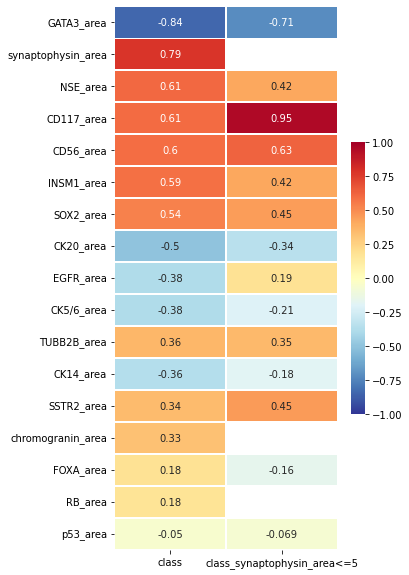

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots( figsize=(5, 10) )
sns.heatmap(merged,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            #mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin=-1, vmax=1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

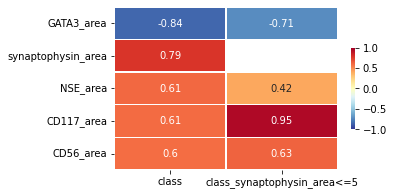

In [64]:
fig, ax = plt.subplots( figsize=(5, 3) )
sns.heatmap(merged_small,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            #mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin=-1, vmax=1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

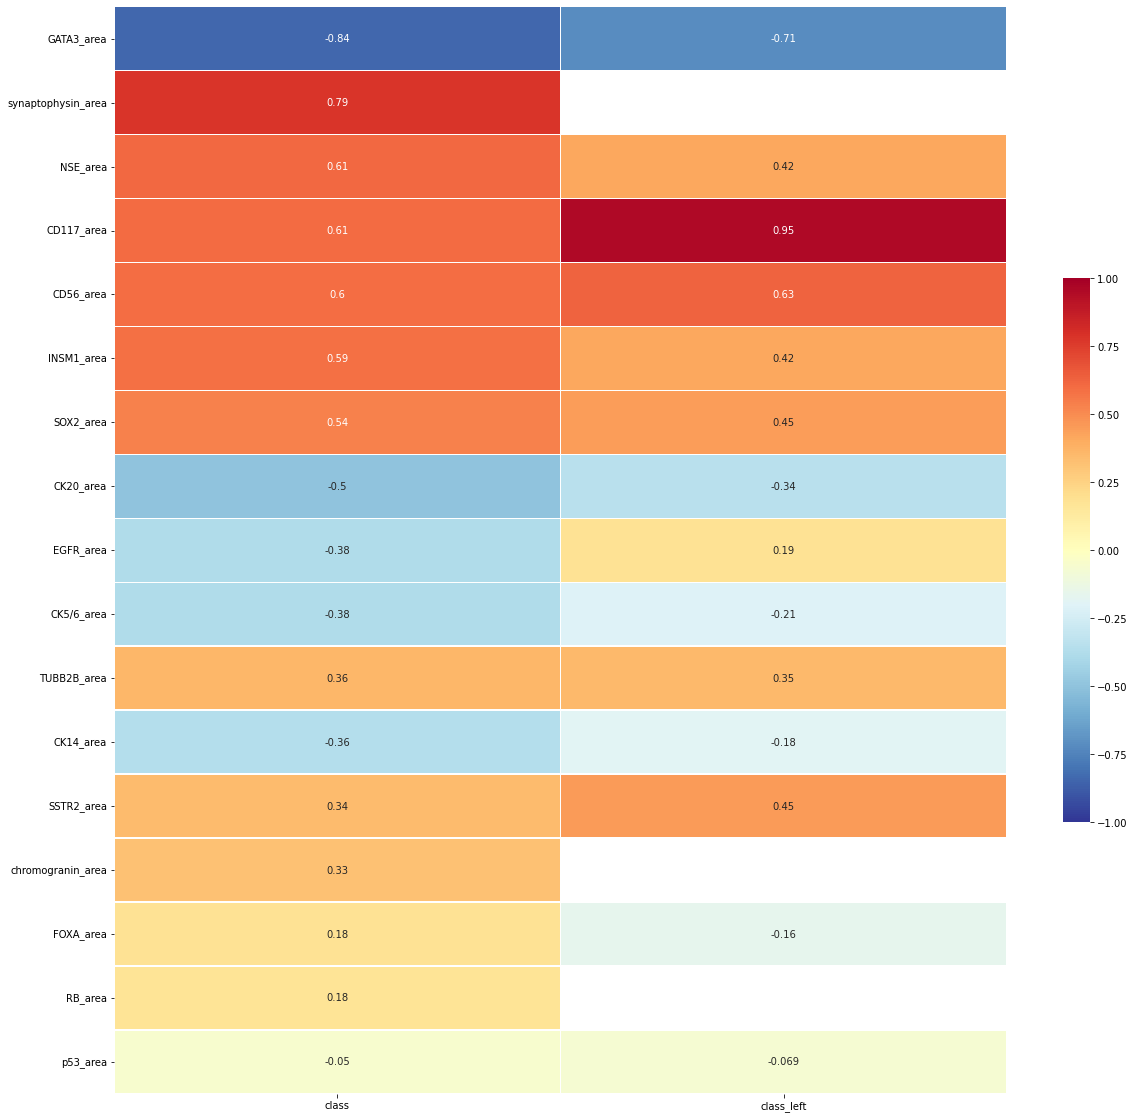

In [53]:
fig, ax = plt.subplots( figsize=(20,20) )
sns.heatmap(merged,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            #mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


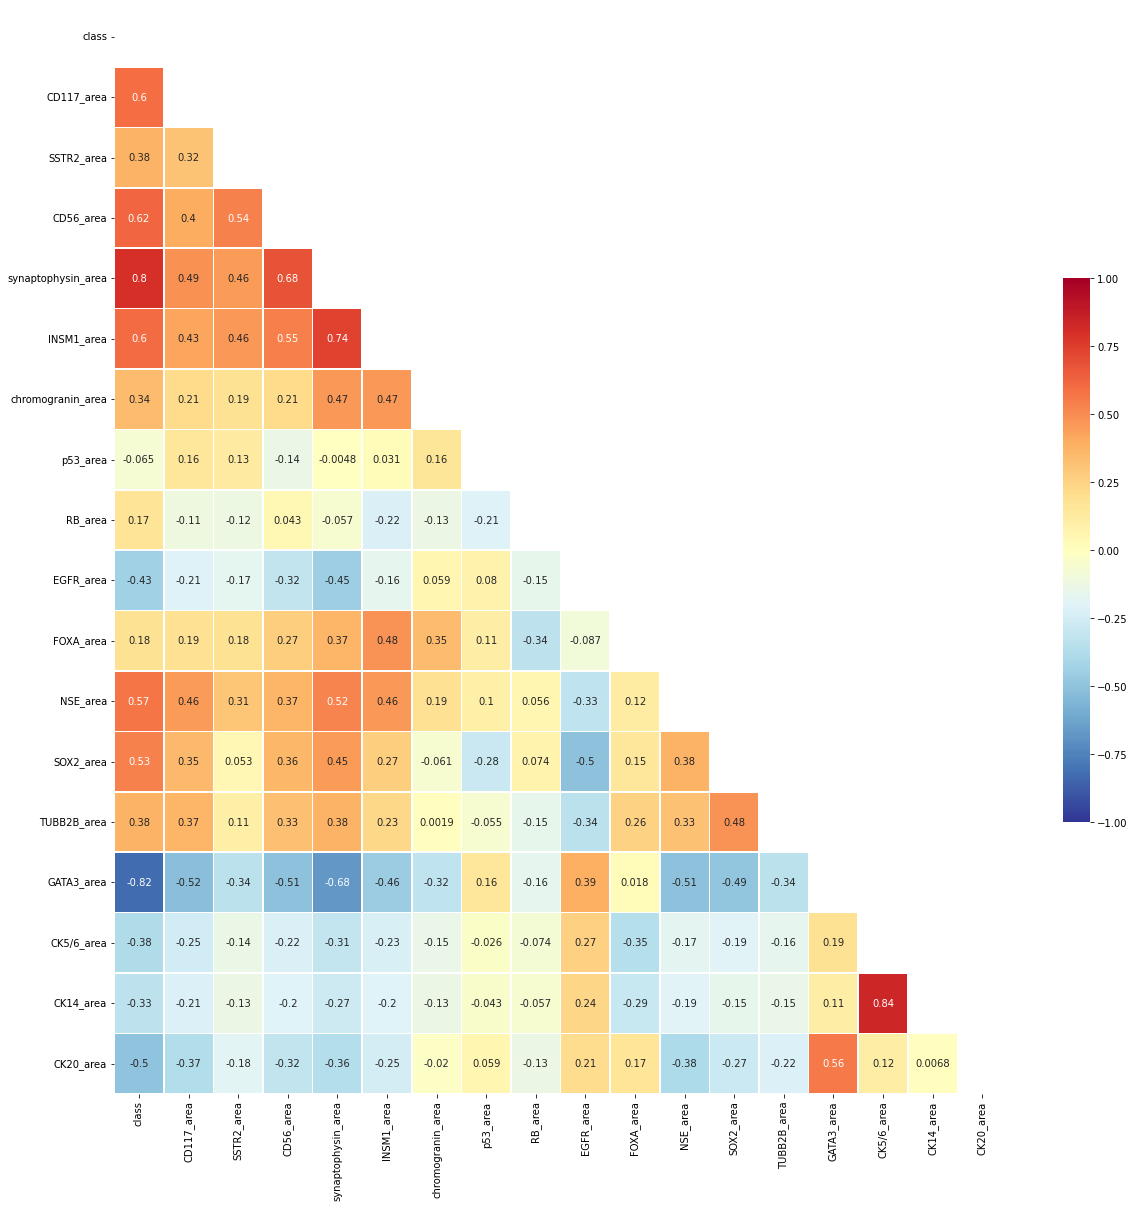

In [ ]:
fig, ax = plt.subplots( figsize=(20,20) )
mask = np.zeros_like(area_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(area_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
cols = []

for i, c in enumerate(df.columns):
  if i == 0:
    cols.append('class')
  else:
    tt = c.split('_')[0]
    if tt == 'synapto':
      tt = 'Synaptophysin'
    if i % 2 == 1:
      cols.append(f'{tt}_Intensity')
    else:
      cols.append(f'{tt}_Area')

cols

['class',
 'CD117_Intensity',
 'CD117_Area',
 'SSTR2_Intensity',
 'SSTR2_Area',
 'CD56_Intensity',
 'CD56_Area',
 'Synaptophysin_Intensity',
 'Synaptophysin_Area',
 'INSM1_Intensity',
 'INSM1_Area',
 'Chromogranin_Intensity',
 'Chromogranin_Area',
 'p53_Intensity',
 'p53_Area',
 'RB_Intensity',
 'RB_Area',
 'EGFR_Intensity',
 'EGFR_Area',
 'FOXA_Intensity',
 'FOXA_Area',
 'NSE_Intensity',
 'NSE_Area',
 'SOX2_Intensity',
 'SOX2_Area',
 'TUBB_Intensity',
 'TUBB_Area',
 'GATA3_Intensity',
 'GATA3_Area',
 'CK5/6_Intensity',
 'CK5/6_Area',
 'CK14_Intensity',
 'CK14_Area',
 'CK20_Intensity',
 'CK20_Area']

In [ ]:
df.columns = cols
df.shape

(211, 35)

In [ ]:
pd.value_counts(df['class'])

1    146
2    65 
Name: class, dtype: int64

In [ ]:
df.dtypes

class                      int64
CD117_Intensity            int64
CD117_Area                 int64
SSTR2_Intensity            int64
SSTR2_Area                 int64
CD56_Intensity             int64
CD56_Area                  int64
Synaptophysin_Intensity    int64
Synaptophysin_Area         int64
INSM1_Intensity            int64
INSM1_Area                 int64
Chromogranin_Intensity     int64
Chromogranin_Area          int64
p53_Intensity              int64
p53_Area                   int64
RB_Intensity               int64
RB_Area                    int64
EGFR_Intensity             int64
EGFR_Area                  int64
FOXA_Intensity             int64
FOXA_Area                  int64
NSE_Intensity              int64
NSE_Area                   int64
SOX2_Intensity             int64
SOX2_Area                  int64
TUBB_Intensity             int64
TUBB_Area                  int64
GATA3_Intensity            int64
GATA3_Area                 int64
CK5/6_Intensity            int64
CK5/6_Area

In [ ]:
df

,class,CD117_Intensity,CD117_Area,SSTR2_Intensity,SSTR2_Area,CD56_Intensity,CD56_Area,Synaptophysin_Intensity,Synaptophysin_Area,INSM1_Intensity,...,TUBB_Intensity,TUBB_Area,GATA3_Intensity,GATA3_Area,CK5/6_Intensity,CK5/6_Area,CK14_Intensity,CK14_Area,CK20_Intensity,CK20_Area
0,1,0,0,0,0,0,0,1,50,2,...,1,10,0,0,0,0,0,0,0,0
1,1,0,0,2,5,0,0,1,50,1,...,0,0,0,0,0,0,0,0,3,1
2,1,0,0,2,10,1,60,1,80,2,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,3,100,0,0,0,0,2,30
4,2,0,0,0,0,0,0,0,0,0,...,0,0,3,100,0,0,0,0,3,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1,2,80,1,5,2,70,3,70,3,...,3,30,3,100,0,0,0,0,0,0
207,1,1,40,0,0,2,30,3,50,3,...,2,40,3,100,0,0,0,0,3,10
208,1,2,40,0,0,2,10,3,30,3,...,3,30,3,100,0,0,0,0,3,5
209,2,0,0,0,0,0,0,0,0,0,...,3,30,3,100,0,0,0,0,3,90


In [30]:
X = df.drop(columns=['class'])
y = df['class']

random = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)
clf = DecisionTreeClassifier(random_state=random)
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
train_prob = clf.predict_proba(X_train)[:, 0]
test_pred = clf.predict(X_test)
test_prob = clf.predict_proba(X_test)[:, 0]
performance = pd.DataFrame({
    'training': [accuracy_score(y_train, train_pred, normalize=True), 
                 roc_auc_score(y_train, train_pred), 
                 mean_squared_error(y_train, train_prob)], 
    'validation': [accuracy_score(y_test, test_pred, normalize=True), 
                   roc_auc_score(y_test, test_pred), 
                   mean_squared_error(y_test, test_prob)]}, index=['Accuracy', 'AUC', 'MSE'])
performance.round(3)

,training,validation
Accuracy,1.0,0.984
AUC,1.0,0.988
MSE,1.0,0.984


In [31]:
pd.value_counts(y_train), pd.value_counts(y_test)

(1    103
 0    44 
 Name: class, dtype: int64, 1    43
 0    21
 Name: class, dtype: int64)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

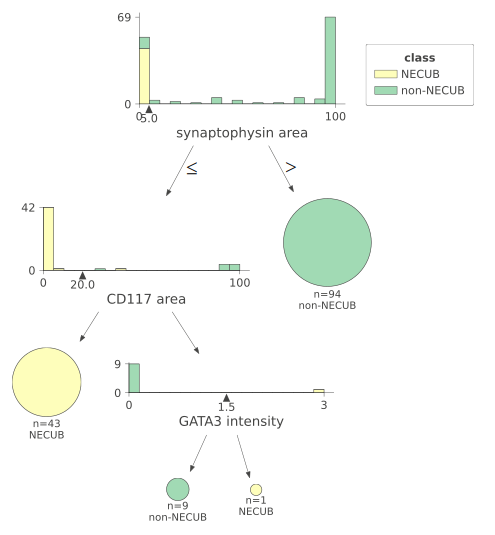

In [32]:
from dtreeviz.trees import *
features = list(map(lambda x: 'Synaptophsyn grade' if x == 'synapto_grade' else x.replace('_', ' '), list(X.columns)))
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=features, 
               precision=1,
               scale=1.5,
               ticks_fontsize=10,
               class_names=['NECUB', 'non-NECUB'])
viz

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


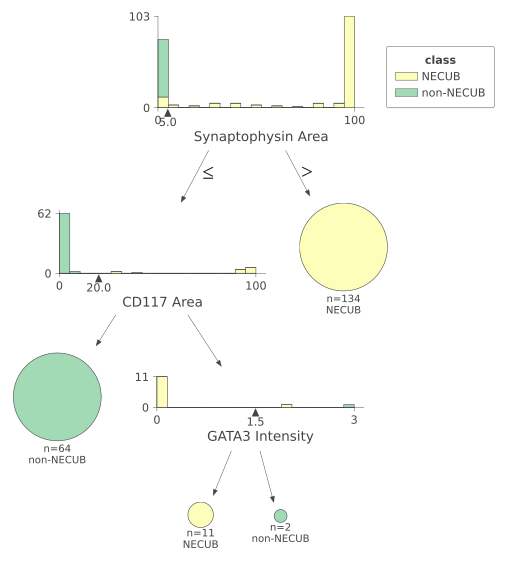

In [ ]:
viz = dtreeviz(clf, 
               x_data=X,
               y_data=y,
               target_name='class',
               feature_names=features, 
               precision=1,
               scale=1.5,
               ticks_fontsize=10,
               class_names=['NECUB', 'non-NECUB'])
viz

In [ ]:
fi = pd.DataFrame({'feature': features, 'importance': clf.feature_importances_})
fi = fi.loc[fi['importance'] > 0.0].sort_values(by=['importance'], ascending=False).reset_index(drop=True).round(3)
fi

,feature,importance
0,Synaptophysin Area,0.758
1,CD117 Area,0.213
2,GATA3 Intensity,0.029


In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
import dtreeviz
dtreeviz.__version__

'1.3.2'

**Material and Methods**

 To derive gens for further study (이 부분은 니가 말 맞게 바꾸삼), as a preliminary study, we developped a tree model using the decision tree classifier algorithm, which repeatedly divides into two groups minimizing each of impurity; on python-3.8, sklearn-1.0.2 and dtreeviz-1.3.2.
 
 The training code and its procedure are as follows:
 
  1. Load the data.
  2. Divide the data to train with probability of 0.7 and validate with probability of 0.3.
  3. Train the training data on the module of DecisionTreeClassifier.
  4. Predict the two data set with the tree model of 3.
  5. Measure the performance of Accuracy, AUC and MSE(Mean Square Error) of the tree model while comparing the prediction results of 4. and their true values.
  6. Visualize the tree model. 


```
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from dtreeviz.trees import *

## home_path is a directory including 'ORIGINAL_grade_only.xlsx'
df = pd.read_excel(home_path + 'ORIGINAL_grade_only.xlsx')
X = df.drop(columns=['seun_diagnosis'])
y = df['seun_diagnosis']

random = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)
clf = DecisionTreeClassifier(random_state=random)
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
train_prob = clf.predict_proba(X_train)[:, 0]
test_pred = clf.predict(X_test)
test_prob = clf.predict_proba(X_test)[:, 0]
performance = pd.DataFrame({
    'training': [accuracy_score(y_train, train_pred, normalize=True), 
                 roc_auc_score(y_train, train_pred), 
                 mean_squared_error(y_train, train_prob)], 
    'validation': [accuracy_score(y_test, test_pred, normalize=True), 
                   roc_auc_score(y_test, test_pred), 
                   mean_squared_error(y_test, test_prob)]}, index=['Accuracy', 'AUC', 'MSE'])
performance.round(3)
print(performance)

features = list(map(lambda x: 'Synaptophsyn grade' if x == 'synapto_grade' else x.replace('_', ' '), list(X.columns)))
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=features, 
               class_names=['NECUB', 'non-NECUB'])
viz
```


 Our obtained tree model actually brought four important gens with their own relative importance out as Table 1(위에 feature importance 표) and its sturucture are as Figure 1. Each distribtion plot, x-axis and y-axis stand for a split-by-condition node, the values of an associating gen and the stacked bar of how many NECUB/non-NECUB are, respectively. A table beside a distribution plot presents the numbers and the ratios on no-condition and two inequality-conditions, the last row for the right as well as the second row for the left, for further understanding. The finally classified cores are colered yellow for NECUB and green as non-NECUB in all of plots and tables. We found that this model works quite properly both in the training data and in the validation data as in Table 2(위에 성능 표). 